In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./Datasets/Price_chart_Game/Rolex/Rolex 16710/price.csv', index_col='Date', parse_dates=True)
df.index.freq
df.sort_index(inplace= True)

In [3]:
df.head()

,Price
Date,
2019-01-04,10267
2019-01-10,11582
2019-01-11,10933
2019-02-05,10588
2019-02-07,10735


<AxesSubplot:xlabel='Date'>

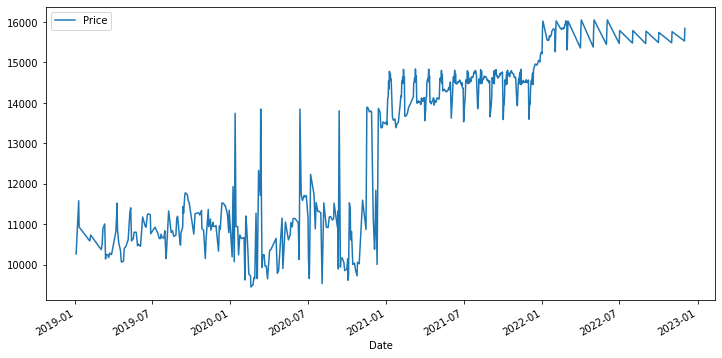

In [4]:
df.plot(figsize=(12,6))

In [5]:
# !pip install --upgrade patsy
# !pip install statsmodels

In [6]:
# from statsmodels.tsa.seasonal import seasonal_decompose

# results = seasonal_decompose(df['Price'])
# results.plot();

In [7]:
len(df)

608

In [8]:
train = df.iloc[:547]
test = df.iloc[547:]

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [10]:
df.head()

,Price
Date,
2019-01-04,10267
2019-01-10,11582
2019-01-11,10933
2019-02-05,10588
2019-02-07,10735


In [11]:
df.tail()

,Price
Date,
2022-10-02,15741
2022-11-01,15485
2022-11-02,15760
2022-12-01,15530
2022-12-02,15842


In [12]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [13]:
scaled_train[:10]

array([[0.12402983],
       [0.32415158],
       [0.22538426],
       [0.17288084],
       [0.19525186],
       [0.14016131],
       [0.16131487],
       [0.22066657],
       [0.23695024],
       [0.10515903]])

In [14]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [15]:
# define generator
n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [16]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.12402983 0.32415158 0.22538426]
Predict this y: 
 [[0.17288084]]


In [17]:
X,y = generator[1]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.32415158 0.22538426 0.17288084]
Predict this y: 
 [[0.19525186]]


In [18]:
X.shape

(1, 3, 1)

In [74]:
# We do the same thing, but now instead for 12 months
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [75]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [76]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [77]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [78]:
# fit model
model.fit(generator,epochs=25)

Epoch 1/25
535/535 [==============================] - 2s 2ms/step - loss: 0.0190
Epoch 2/25
535/535 [==============================] - 1s 2ms/step - loss: 0.0095
Epoch 3/25
535/535 [==============================] - 1s 2ms/step - loss: 0.0086
Epoch 4/25
535/535 [==============================] - 1s 2ms/step - loss: 0.0085
Epoch 5/25
535/535 [==============================] - 1s 2ms/step - loss: 0.0082
Epoch 6/25
535/535 [==============================] - 1s 2ms/step - loss: 0.0080
Epoch 7/25
535/535 [==============================] - 1s 2ms/step - loss: 0.0077
Epoch 8/25
535/535 [==============================] - 1s 2ms/step - loss: 0.0080
Epoch 9/25
535/535 [==============================] - 1s 2ms/step - loss: 0.0077
Epoch 10/25
535/535 [==============================] - 1s 2ms/step - loss: 0.0075
Epoch 11/25
535/535 [==============================] - 1s 2ms/step - loss: 0.0072
Epoch 12/25
535/535 [==============================] - 1s 2ms/step - loss: 0.0074
Epoch 13/25
535/535 [====

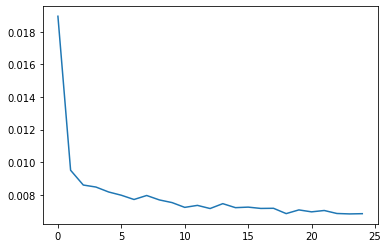

In [79]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [80]:
last_train_batch = scaled_train[-12:] #to make the prediction

In [81]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [82]:
model.predict(last_train_batch)

array([[0.9291512]], dtype=float32)

In [83]:
scaled_test[0]

array([0.92725613])

In [84]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [85]:
test_predictions

[array([0.9291512], dtype=float32),
 array([0.9228235], dtype=float32),
 array([0.9173936], dtype=float32),
 array([0.9139222], dtype=float32),
 array([0.91193396], dtype=float32),
 array([0.910517], dtype=float32),
 array([0.90945446], dtype=float32),
 array([0.90850705], dtype=float32),
 array([0.9111681], dtype=float32),
 array([0.91637397], dtype=float32),
 array([0.91802734], dtype=float32),
 array([0.91698617], dtype=float32),
 array([0.91673255], dtype=float32),
 array([0.9161289], dtype=float32),
 array([0.9153965], dtype=float32),
 array([0.91465354], dtype=float32),
 array([0.91394824], dtype=float32),
 array([0.913302], dtype=float32),
 array([0.9127164], dtype=float32),
 array([0.9123113], dtype=float32),
 array([0.9122174], dtype=float32),
 array([0.9122619], dtype=float32),
 array([0.91222656], dtype=float32),
 array([0.91213346], dtype=float32),
 array([0.9120195], dtype=float32),
 array([0.911868], dtype=float32),
 array([0.91168505], dtype=float32),
 array([0.9114792],

In [86]:
true_predictions = scaler.inverse_transform(test_predictions)

In [87]:
true_predictions

array([[15557.45238674],
       [15515.87314433],
       [15480.19350845],
       [15457.38271487],
       [15444.3180415 ],
       [15435.00705791],
       [15428.02528894],
       [15421.79981953],
       [15439.28557491],
       [15473.49334455],
       [15484.35766011],
       [15477.51610619],
       [15475.84958386],
       [15471.8828299 ],
       [15467.07047743],
       [15462.18840909],
       [15457.55387121],
       [15453.3074705 ],
       [15449.45939016],
       [15446.79765439],
       [15446.18039489],
       [15446.47296649],
       [15446.24071085],
       [15445.62893462],
       [15444.88007665],
       [15443.88447154],
       [15442.68246049],
       [15441.32965952],
       [15439.87933469],
       [15438.37809378],
       [15436.89095271],
       [15435.51739365],
       [15434.30167443],
       [15433.19836223],
       [15432.1584993 ],
       [15431.16524416],
       [15430.20175534],
       [15429.255108  ],
       [15428.31276894],
       [15427.37512982],


In [88]:
test['Predictions'] = true_predictions

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_6276/4269337381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


In [89]:
test.head(), test.tail()

(            Price   Predictions
 Date                           
 2022-01-14  15545  15557.452387
 2022-01-15  15545  15515.873144
 2022-01-16  15560  15480.193508
 2022-01-17  15555  15457.382715
 2022-01-18  15652  15444.318042,
             Price   Predictions
 Date                           
 2022-10-02  15741  15413.792287
 2022-11-01  15485  15413.145262
 2022-11-02  15760  15412.512727
 2022-12-01  15530  15411.895076
 2022-12-02  15842  15411.291133)

<AxesSubplot:xlabel='Date'>

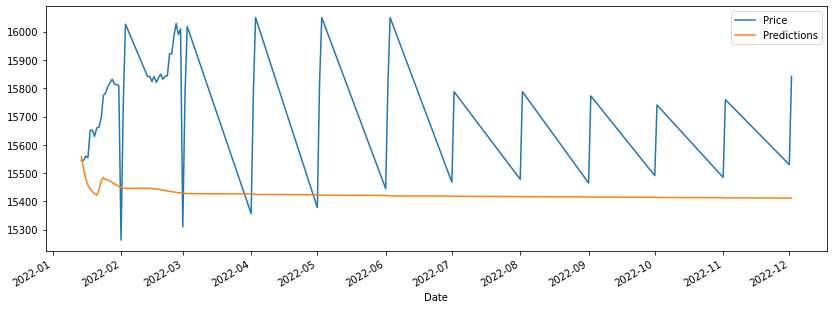

In [90]:
test.plot(figsize=(14,5))

In [91]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['Price'],test['Predictions']))
print(rmse)

361.7911010880422
